# 📘 Parquet Feature Exploration
Friendly visualizations to better understand your merged `features_all.parquet` file.

In [ ]:
# 📦 Setup
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 📁 Load the merged Parquet
parquet_path = "features_parquet/22-05-2025/features_all.parquet"
# parquet_path = "/tmp/pytest-of-codespace/pytest-8/test_generate_feature_parquets0/features_parquet/features_all.parquet"
df = pl.read_parquet(parquet_path)

# 🔁 Convert to pandas for viz (optional)
pdf = df.to_pandas()

# 👀 Preview data
pdf.head()


,ticker,6m_return,12m_return,volatility,max_drawdown_1y,sector_relative_6m,sma_50_200_delta,net_debt_to_ebitda,ebit_interest_cover,ebit_interest_cover_capped,...,sector_industrials,sector_utilities,sector_financial_services,country,has_eps_cagr_3y,has_fcf_cagr_3y,has_dividend_yield,has_dividend_cagr_3y,has_dividend_cagr_5y,has_ebit_interest_cover
0,AAPL,-0.118730,0.063568,0.300213,0.333605,-0.009577,-0.082659,0.307256,inf,True,...,0,0,0,United States,1,1,1,1,1,1
1,AOS,-0.076733,-0.196358,0.281922,0.343024,-0.340887,-0.085502,-0.075524,106.985075,False,...,1,0,0,United States,1,1,1,1,1,1
2,CHRW,-0.085843,0.181707,0.290013,0.232658,0.037178,-0.062549,2.081910,7.440108,False,...,1,0,0,United States,1,1,1,1,1,1
3,DVN,-0.190592,-0.333298,0.487206,0.457030,-0.253665,-0.104022,1.138979,9.256858,False,...,0,0,0,United States,1,0,1,1,1,1
4,GE,0.293711,0.461974,0.342618,0.213643,0.317445,0.080581,0.477222,6.751521,False,...,1,0,0,United States,0,1,1,1,1,1


In [27]:
group_size = 2
all_columns = [col for col in pdf.columns if col != "ticker"]

for i in range(0, len(all_columns), group_size):
    cols_to_print = ["ticker"] + all_columns[i:i + group_size]
    print(pdf[cols_to_print])
    print("-" * 60)


   ticker  6m_return  12m_return
0    AAPL  -0.118730    0.063568
1     AOS  -0.076733   -0.196358
2    CHRW  -0.085843    0.181707
3     DVN  -0.190592   -0.333298
4      GE   0.293711    0.461974
5   GOOGL   0.025416   -0.039767
6     JPM   0.062178    0.346851
7     MCD   0.103009    0.219609
8    NFLX   0.330634    0.865240
9       O  -0.010603    0.087512
10   PAYC   0.120719    0.435079
11    PEP  -0.182601   -0.261469
12   PLTR   0.873815    4.695796
13   PYPL  -0.174254    0.152115
14   QCOM  -0.024672   -0.239433
15    TAP  -0.064459    0.053857
16    TPL  -0.214717    1.272598
17    UPS  -0.267012   -0.295323
18    USB  -0.164450    0.101300
19      V   0.159973    0.309619
------------------------------------------------------------
   ticker  volatility  max_drawdown_1y
0    AAPL    0.300213         0.333605
1     AOS    0.281922         0.343024
2    CHRW    0.290013         0.232658
3     DVN    0.487206         0.457030
4      GE    0.342618         0.213643
5   GOOGL   

In [28]:
# 📊 Basic Info
print("Shape:", pdf.shape)
print("\nColumn types:\n", pdf.dtypes)
pdf.describe(include='all').T


Shape: (20, 38)

Column types:
 ticker                            object
6m_return                        float64
12m_return                       float64
volatility                       float64
max_drawdown_1y                  float64
sector_relative_6m               float64
sma_50_200_delta                 float64
net_debt_to_ebitda               float64
ebit_interest_cover              float64
ebit_interest_cover_capped          bool
eps_cagr_3y                      float64
fcf_cagr_3y                      float64
dividend_yield                   float64
dividend_cagr_3y                 float64
dividend_cagr_5y                 float64
yield_vs_5y_median               float64
pe_ratio                         float64
pfcf_ratio                       float64
payout_ratio                     float64
sector_materials                   int64
sector_basic_materials             int64
sector_healthcare                  int64
sector_consumer_cyclical           int64
sector_real_estate       

/workspaces/dvmax/venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ticker,20,20,AAPL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6m_return,20.0,NaN,NaN,NaN,0.01974,0.259892,-0.267012,-0.166901,-0.044566,0.107437,0.873815
12m_return,20.0,NaN,NaN,NaN,0.394059,1.086406,-0.333298,-0.078915,0.126707,0.368908,4.695796
volatility,20.0,NaN,NaN,NaN,0.345474,0.131898,0.173336,0.278698,0.305644,0.42977,0.733087
max_drawdown_1y,20.0,NaN,NaN,NaN,0.285763,0.099695,0.110997,0.20845,0.286617,0.367651,0.45703
sector_relative_6m,20.0,NaN,NaN,NaN,0.268443,1.102497,-0.439852,-0.258038,-0.0138,0.176174,4.622651
sma_50_200_delta,20.0,NaN,NaN,NaN,0.008012,0.134924,-0.141404,-0.086079,-0.034227,0.082516,0.429227
net_debt_to_ebitda,20.0,NaN,NaN,NaN,0.011373,3.371072,-9.583624,-0.428938,0.224592,1.737269,6.079959
ebit_interest_cover,20.0,NaN,NaN,NaN,inf,NaN,0.51434,7.267961,13.981321,126.878512,inf
ebit_interest_cover_capped,20,2,False,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


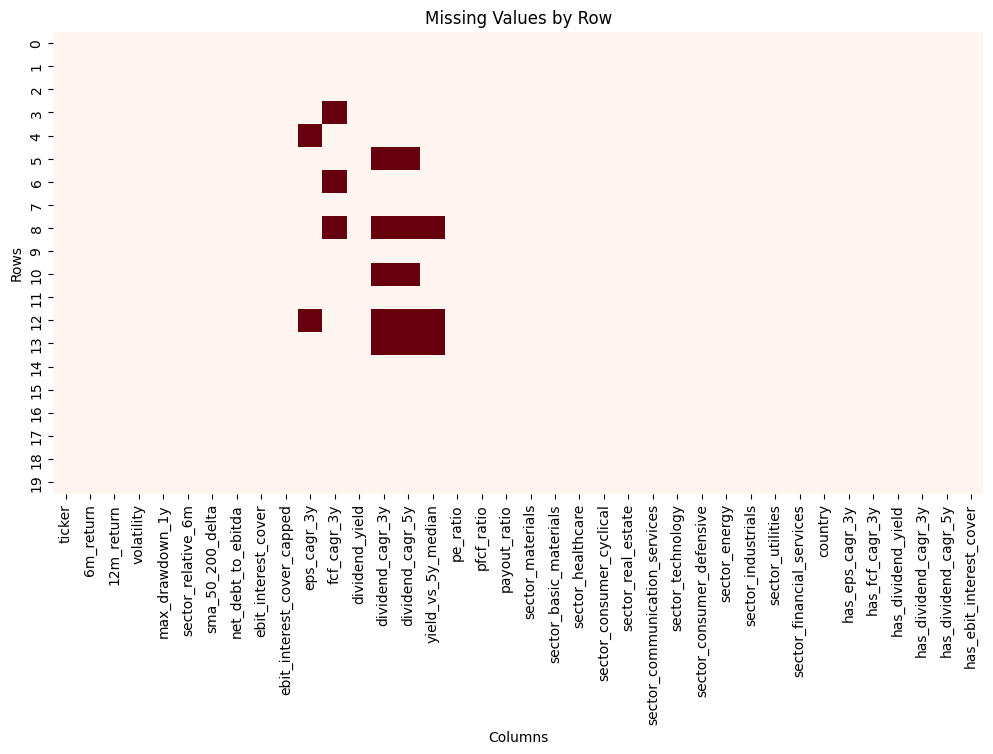

In [29]:
# 🧼 Null Values Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pdf.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Values by Row")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


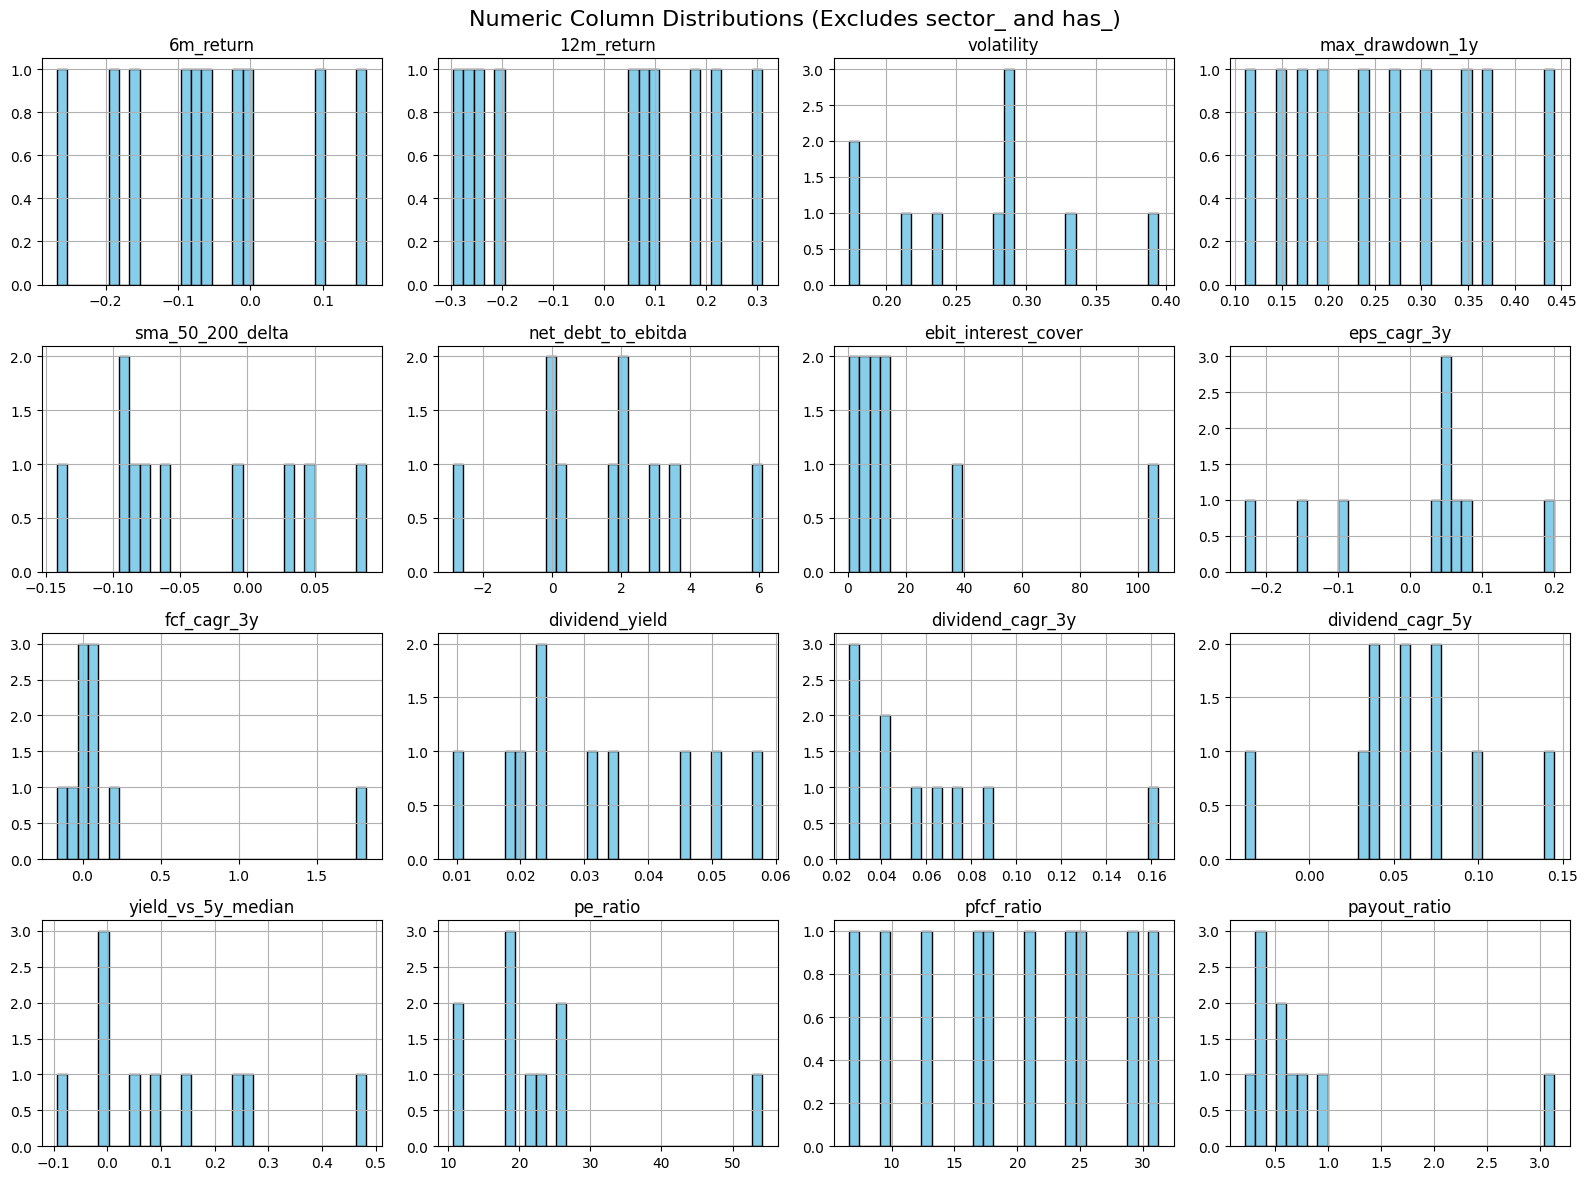

In [ ]:
# Filter numeric columns
pdf_numeric = pdf.select_dtypes(include=["number"])

# Drop sector_ and has_ columns
pdf_numeric = pdf_numeric.drop(columns=[
    col for col in pdf_numeric.columns if col.startswith("sector_") or col.startswith("has_")
])

# Keep only rows with all finite values
pdf_numeric_clean = pdf_numeric[np.isfinite(pdf_numeric).all(axis=1)]

# Plot histograms
pdf_numeric_clean.hist(
    figsize=(16, 12), bins=30, edgecolor='black', color='skyblue'
)
plt.suptitle("Numeric Column Distributions (Excludes sector_ and has_)", fontsize=16)
plt.tight_layout()
plt.show()


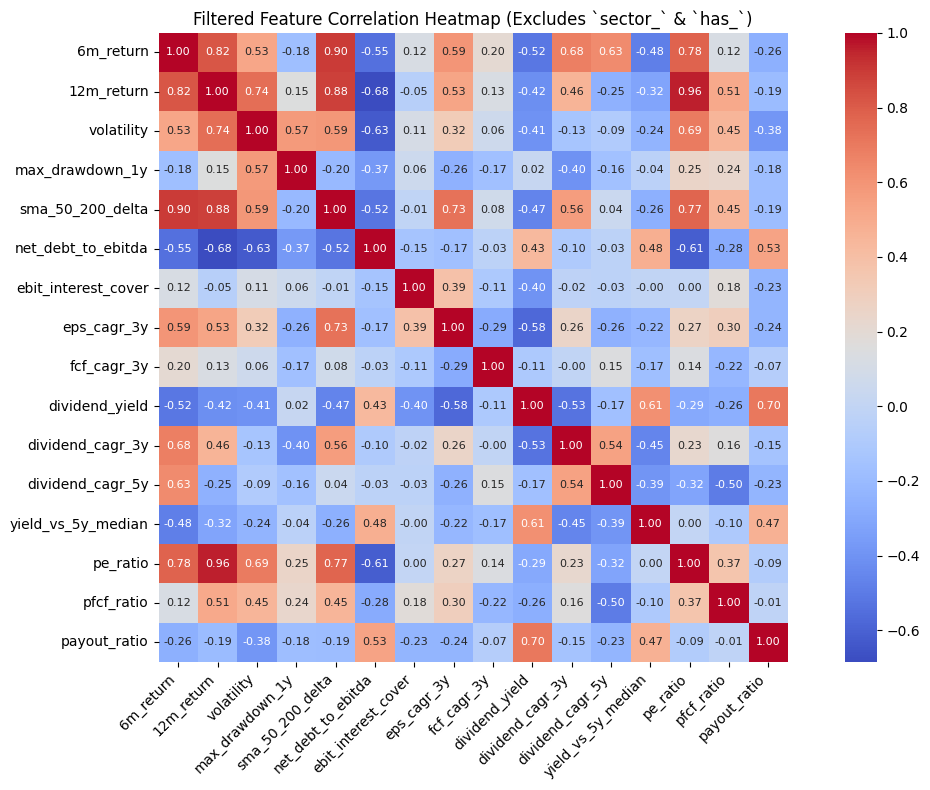

In [ ]:
# Select numeric columns
numeric_df = pdf.select_dtypes(include="number")

# Drop sector_ and has_ columns
columns_to_drop = [col for col in numeric_df.columns if col.startswith("sector_") or col.startswith("has_")]
filtered_df = numeric_df.drop(columns=columns_to_drop)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(
    filtered_df.corr(),
    annot=True, fmt=".2f", cmap="coolwarm",
    square=True, cbar=True,
    annot_kws={"size": 8}
)
plt.title("Filtered Feature Correlation Heatmap (Excludes `sector_` & `has_`)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


/workspaces/dvmax/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


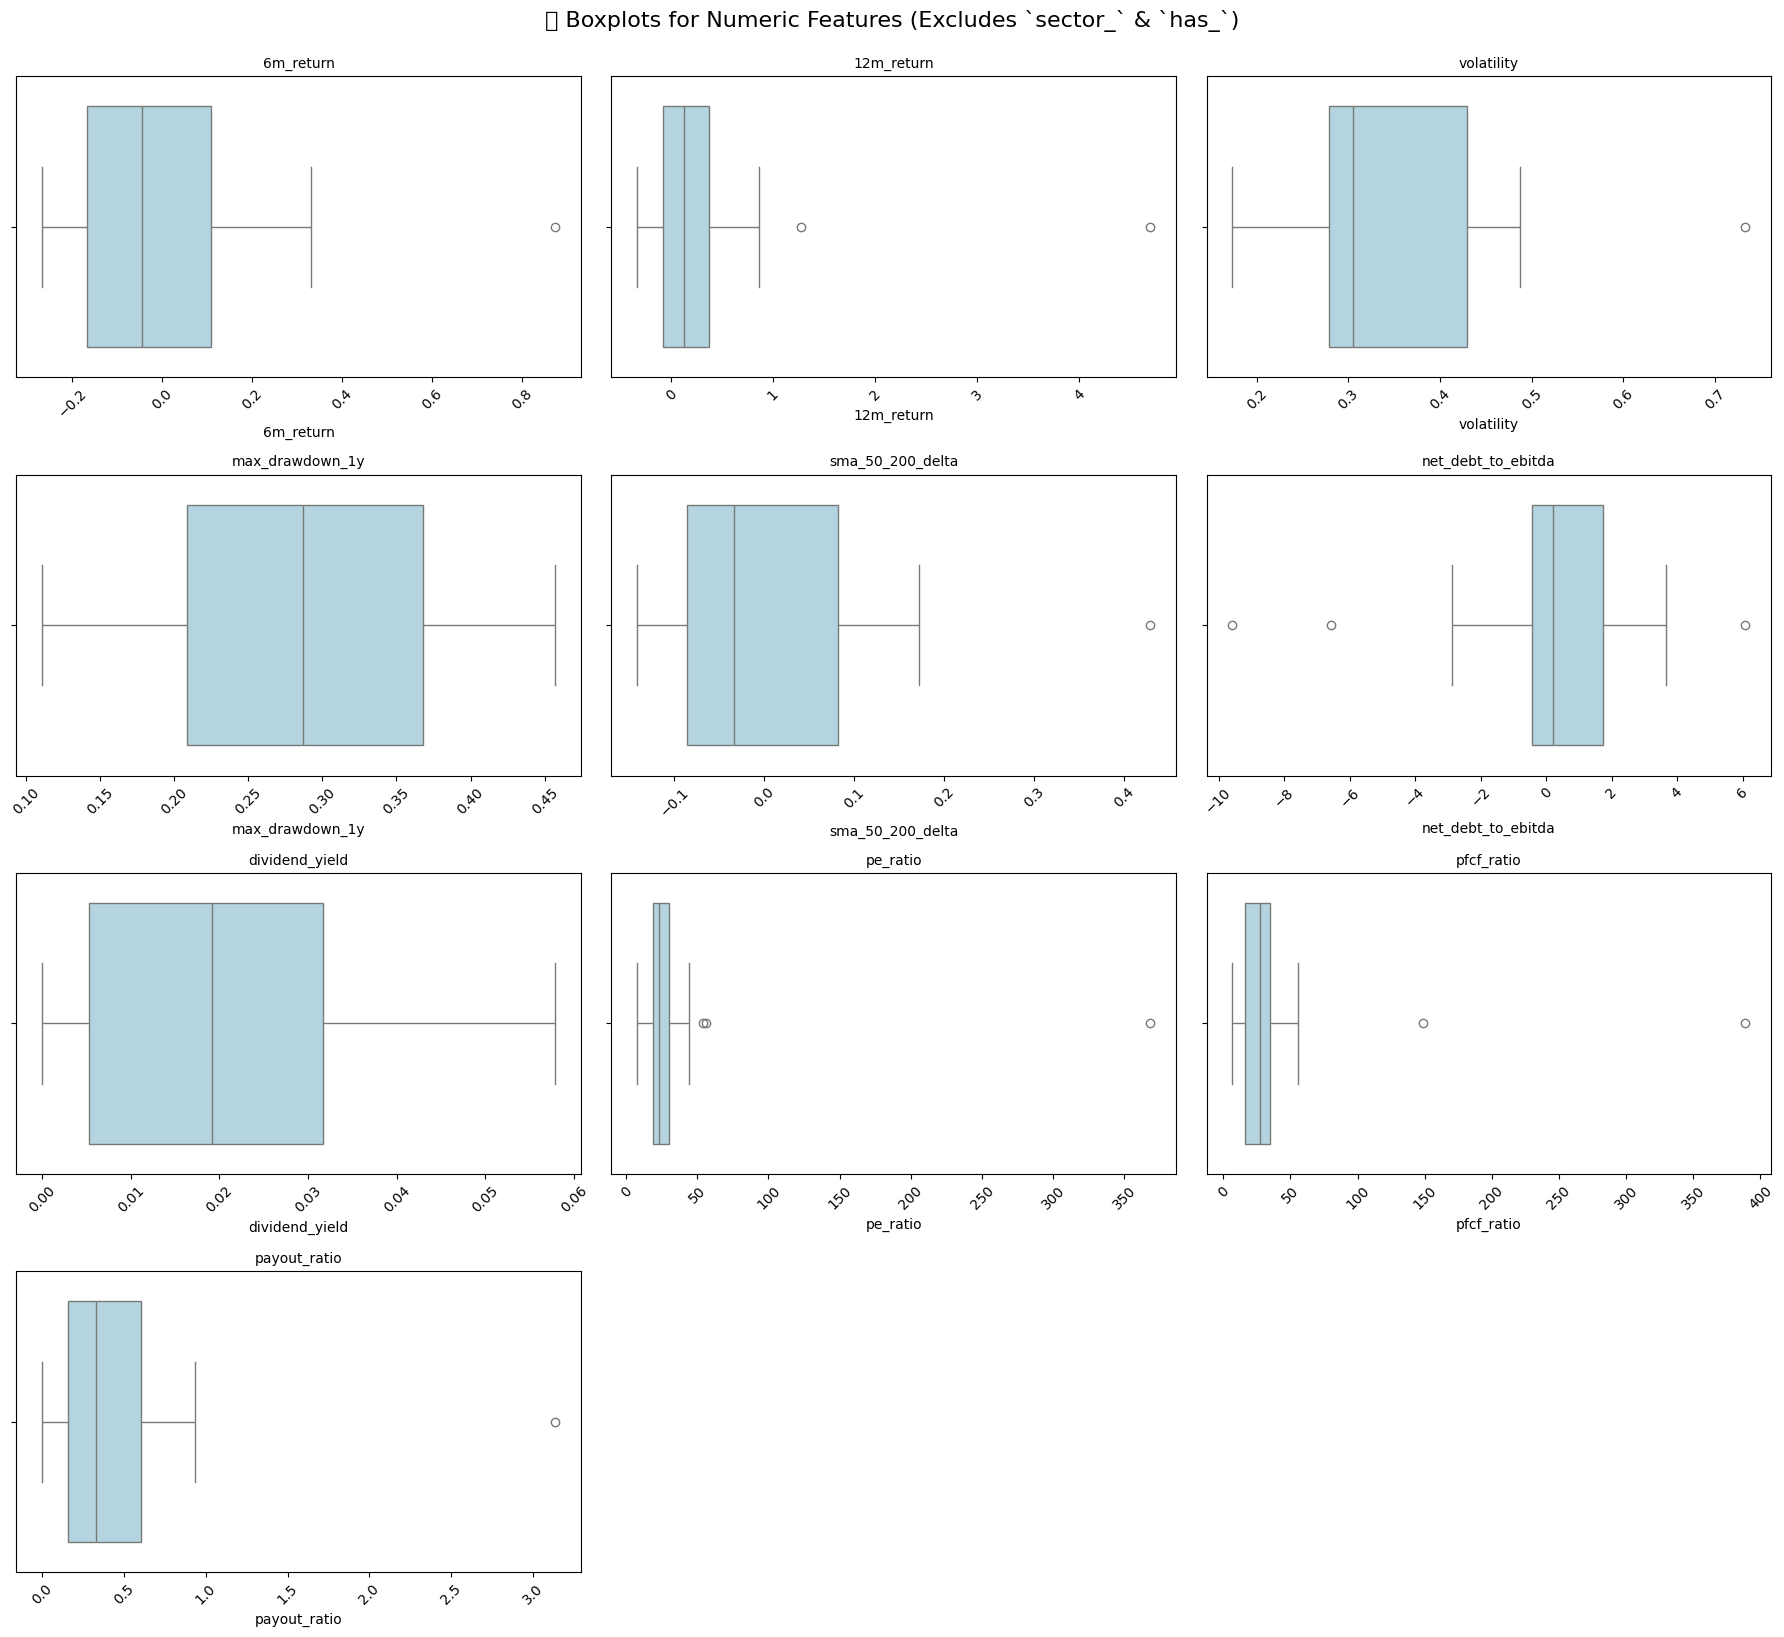

In [48]:
# Step 1: Filter numeric columns
pdf_numeric = pdf.select_dtypes(include="number")

# Step 2: Drop sector_ and has_ columns
pdf_numeric = pdf_numeric.drop(columns=[
    col for col in pdf_numeric.columns if col.startswith("sector_") or col.startswith("has_")
])

# Step 3: Drop columns with only NaNs or non-finite values
pdf_numeric = pdf_numeric.loc[:, np.isfinite(pdf_numeric).all()]

# Step 4: Plot all numeric columns (adjust subplot grid dynamically)
numeric_cols = pdf_numeric.columns
n_cols = 3  # number of plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=pdf_numeric[col], color="lightblue")
    plt.title(f"{col}", fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("📦 Boxplots for Numeric Features (Excludes `sector_` & `has_`)", fontsize=16, y=1.02)
plt.show()

In [33]:
# 🧪 Check for duplicate rows or tickers
if "ticker" in pdf.columns:
    dupe_count = pdf.duplicated(subset="ticker").sum()
    print(f"Duplicate ticker entries: {dupe_count}")
else:
    print("No 'ticker' column found.")


Duplicate ticker entries: 0


### 📊 Radar Plot (per ticker for selected metrics)

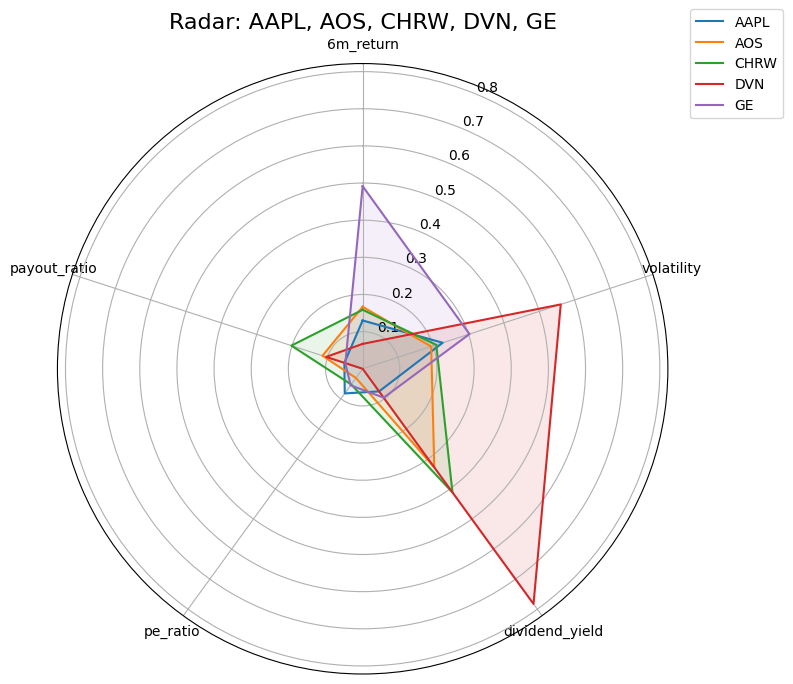

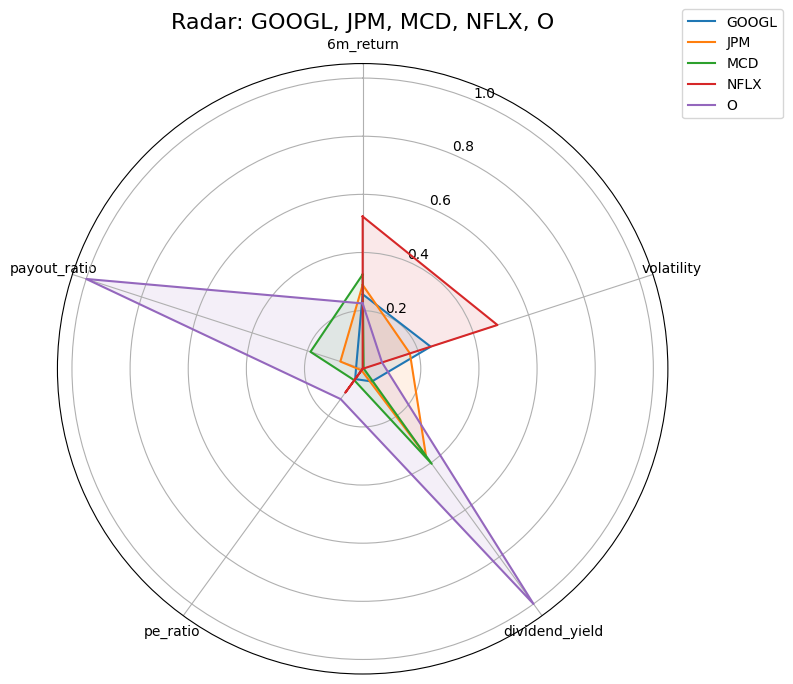

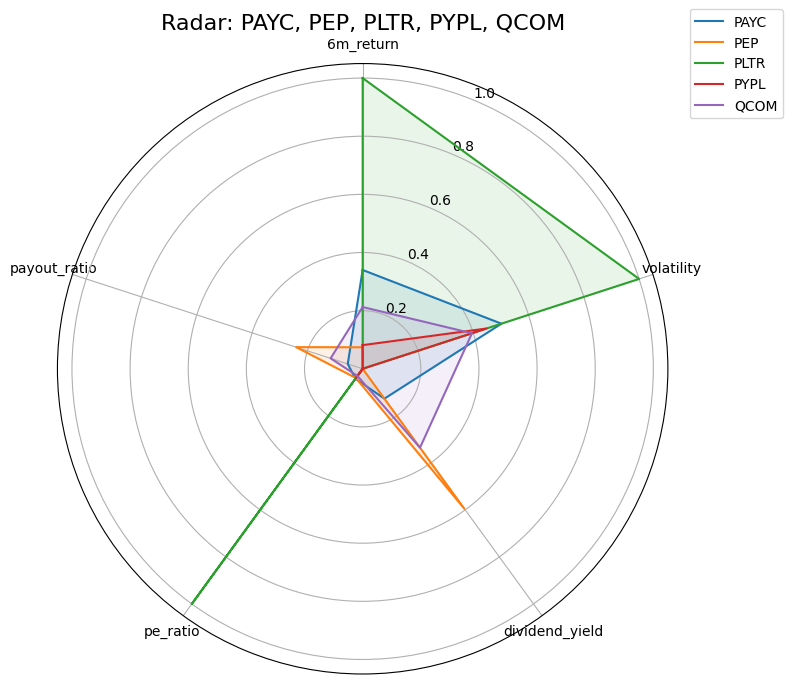

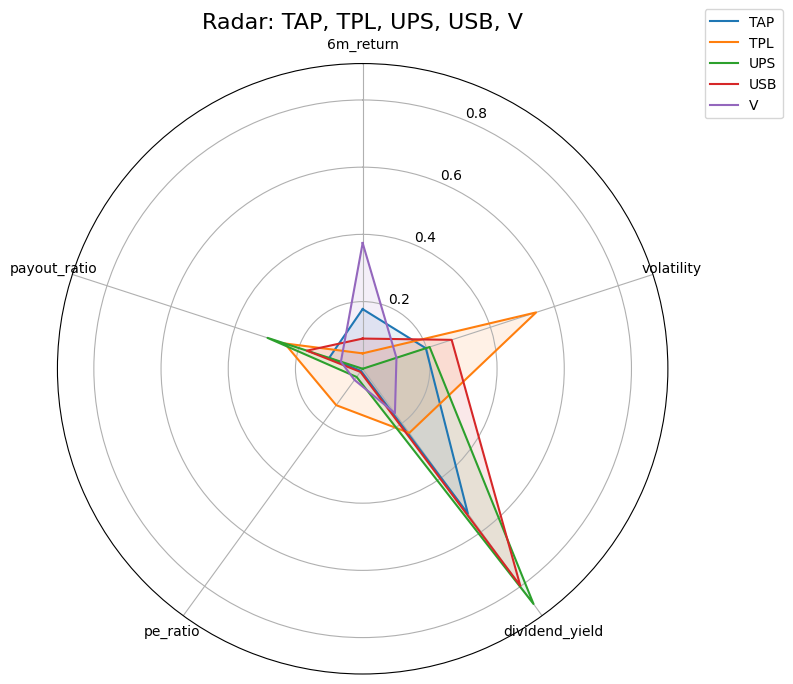

In [ ]:
def plot_radar(df, tickers, features, title="Radar Chart"):
    df = df.set_index("ticker")
    df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=features)
    
    if not all(t in df.index for t in tickers):
        return  # Skip if any ticker is missing

    df_norm = (df[features] - df[features].min()) / (df[features].max() - df[features].min())
    df_norm = df_norm.loc[tickers]

    num_vars = len(features)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # complete the circle

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for ticker in df_norm.index:
        values = df_norm.loc[ticker].tolist()
        values += values[:1]
        ax.plot(angles, values, label=ticker)
        ax.fill(angles, values, alpha=0.1)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), features)
    ax.set_title(title, size=16)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.tight_layout()
    plt.show()

# Set the metrics for radar comparison
radar_metrics = ["6m_return", "volatility", "dividend_yield", "pe_ratio", "payout_ratio"]

# Get all tickers, clean, and iterate in groups of 5
unique_tickers = pdf["ticker"].dropna().unique().tolist()

jump = 5
# Batch 5-by-5
for i in range(0, len(unique_tickers), jump):
    batch = unique_tickers[i:i+jump]
    plot_radar(pdf.copy(), batch, radar_metrics, title=f"Radar: {', '.join(batch)}")
